#seeds
Measurements of geometrical properties of kernels belonging to three different varieties of wheat. A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes.

## Initilize Spark

In [0]:
import pyspark

## Load the data

In [0]:
df = sqlContext.sql("SELECT * FROM  seed_csv")

In [0]:
df.count()

Out[3]: 210

In [0]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [0]:
df.columns

Out[5]: ['area',
 'perimeter',
 'compactness',
 'kernel_length',
 'kernel_width',
 'asymmentry_coefficient',
 'groove_length']

## Create Feature Vector

In [0]:
col = ['area', 'perimeter', 'compactness', 'kernel_length', 'kernel_width', 'asymmentry_coefficient', 'groove_length']

assembler = VectorAssembler(inputCols=col, outputCol="features")

In [0]:
final_data  = assembler.transform(df)

## StandardScaler

In [0]:
from pyspark.ml.feature import StandardScaler

In [0]:
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")

In [0]:
scaler_model = scaler.fit(final_data)

In [0]:
final_data = scaler_model.transform(final_data)

# K means

In [0]:
from pyspark.ml.clustering import KMeans

In [0]:
from pyspark.ml.evaluation import ClusteringEvaluator

In [0]:
kmeans = KMeans(featuresCol='features', k=3)

In [0]:
model = kmeans.fit(final_data)

In [0]:
prediction = model.transform(final_data)

In [0]:
# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(prediction)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.6583885316689585


[18.20328947 16.06855263  0.88462105  6.12059211  3.66952632  3.40502763
  5.95847368]
  
[12.94425373 13.70328358  0.86327239  5.34945522  3.02554478  3.86761269
  5.09590299]

  0.7161978322145462

0.6583885316689585

[14.81910448 14.53716418  0.88052239  5.59101493  3.29935821  2.70658507
  5.21753731]

[11.98865854 13.28439024  0.85273659  5.22742683  2.88008537  4.58392683
  5.0742439 ]
  
[18.72180328 16.29737705  0.88508689  6.20893443  3.72267213  3.60359016
  6.06609836]

In [0]:
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[14.81910448 14.53716418  0.88052239  5.59101493  3.29935821  2.70658507
  5.21753731]
[11.98865854 13.28439024  0.85273659  5.22742683  2.88008537  4.58392683
  5.0742439 ]
[18.72180328 16.29737705  0.88508689  6.20893443  3.72267213  3.60359016
  6.06609836]


In [0]:
silhouettes = []
for i in range(2, 10):
    kmeans = KMeans(featuresCol='features', k=i)
    model = kmeans.fit(final_data)
    prediction = model.transform(final_data)
    silhouette = evaluator.evaluate(prediction)
    silhouettes.append(silhouette)

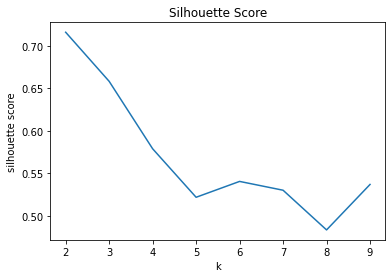

In [0]:
import matplotlib.pyplot as plt
  
plt.plot(range(2, 10),silhouettes)
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('Silhouette Score')
plt.show()